In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('pokemon_data.csv')
df.drop('#',axis=1,inplace = True)
df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
# Here I began with simple condtional filtering on the data frame returning the name anf
df[(df['Legendary']== True) & (df['Type 1']== 'Water') ][['Name','Type 1','Type 2','Legendary']]

,Name,Type 1,Type 2,Legendary
264,Suicune,Water,NaN,True
421,Kyogre,Water,NaN,True
422,KyogrePrimal Kyogre,Water,NaN,True
541,Palkia,Water,Dragon,True


In [5]:
spd = df[['Type 1','Speed']]
spd.groupby('Type 1').std()

,Speed
Type 1,
Bug,33.227599
Dark,27.768203
Dragon,23.239961
Electric,26.691607
Fairy,23.305200
Fighting,26.054567
Fire,25.245783
Flying,32.098806
Ghost,28.020280


In [5]:
Type1_only = df[df['Type 2'].isnull() == True][['Name','Type 1']]
Type1_only

,Name,Type 1
4,Charmander,Fire
5,Charmeleon,Fire
9,Squirtle,Water
10,Wartortle,Water
11,Blastoise,Water
...,...,...
775,Sliggoo,Dragon
776,Goodra,Dragon
788,Bergmite,Ice
789,Avalugg,Ice


I noticed that a few of the Pokemon icluded the word Mega in their name which led me to a conclusion that there is another attribute of Pokemon to explore.

In [70]:
df['Name'].str.split(:)

0                    [Bulbasaur]
1                      [Ivysaur]
2                     [Venusaur]
3       [VenusaurMega, Venusaur]
4                   [Charmander]
                  ...           
796       [DiancieMega, Diancie]
797       [HoopaHoopa, Confined]
798        [HoopaHoopa, Unbound]
799                  [Volcanion]
Mega                         NaN
Name: Name, Length: 801, dtype: object

In [11]:
df.pivot_table(values =['HP'],columns=['Type 1'], index=['Legendary'])

HP                                                      \
Type 1           Bug       Dark      Dragon Electric    Fairy   Fighting   
Legendary                                                                  
False      56.884058  64.655172   72.650000   57.325   70.875  69.851852   
True             NaN  98.000000  101.083333   84.500  126.000        NaN   

                                                                          \
Type 1          Fire Flying       Ghost      Grass     Ground        Ice   
Legendary                                                                  
False      67.085106   62.5   58.733333  65.940299  70.821429  70.818182   
True       96.400000   79.0  150.000000  97.000000  94.500000  85.000000   

                                                                      
Type 1         Normal Poison    Psychic    Rock      Steel     Water  
Legendary                                                             
False       76.489583  67.25  67.720930  65.125  60.434783  71.12037  
True       115.000000    NaN  79.571429  67.750  92.750000  97.50000

In [4]:
pokemon = df[['Name','Type 1','Attack','Defense','Speed']]
pokemon.head(10)


,Name,Type 1,Attack,Defense,Speed
0,Bulbasaur,Grass,49,49,45
1,Ivysaur,Grass,62,63,60
2,Venusaur,Grass,82,83,80
3,VenusaurMega Venusaur,Grass,100,123,80
4,Charmander,Fire,52,43,65
5,Charmeleon,Fire,64,58,80
6,Charizard,Fire,84,78,100
7,CharizardMega Charizard X,Fire,130,111,100
8,CharizardMega Charizard Y,Fire,104,78,100
9,Squirtle,Water,48,65,43


In [13]:
pokemon.sort_values(['Speed'], ascending = False)

,Name,Type 1,Attack,Defense,Speed
431,DeoxysSpeed Forme,Psychic,95,90,180
315,Ninjask,Bug,90,45,160
428,DeoxysNormal Forme,Psychic,150,50,150
154,AerodactylMega Aerodactyl,Rock,135,85,150
71,AlakazamMega Alakazam,Psychic,50,65,150
...,...,...,...,...,...
658,Ferroseed,Grass,50,91,10
486,Bonsly,Rock,80,95,10
359,Trapinch,Ground,100,45,10
230,Shuckle,Bug,10,230,5


In [140]:
Grass_Type = pokemon[pokemon['Type 1'] == 'Grass'][['Name','Type 1','Attack','Defense','Speed']]
Fastest_GrassType = pd.DataFrame(Grass_Type.sort_values(['Speed'], ascending = False).iloc[0])
#Here we have created data frames for the fastest pokemon of each type
Fastest_GrassType

,275
Name,SceptileMega Sceptile
Type 1,Grass
Attack,110
Defense,75
Speed,145


In [19]:
df['Total'] = df.iloc[:,3:9].sum(axis=1)
#Here we have added the values from collumn HP to Speed to create our total
df.head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


In [4]:
df.to_csv('Pokemon_Updated.csv',index = False)

In [21]:
df['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [22]:
# Here I have created a new data frame of the Pokemon from generation 6. 
#The reasoning behing this decesion was that I wanted to drill down on Pokemon from a particular generation.
Gen_Six = df[df['Generation']==6][['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
'Generation', 'Legendary', 'Total']]
Gen_Six.head(10)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
718,Chespin,Grass,NaN,56,61,65,48,45,38,6,False,313
719,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False,405
720,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False,530
721,Fennekin,Fire,NaN,40,45,40,62,60,60,6,False,307
722,Braixen,Fire,NaN,59,59,58,90,70,73,6,False,409
723,Delphox,Fire,Psychic,75,69,72,114,100,104,6,False,534
724,Froakie,Water,NaN,41,56,40,62,44,71,6,False,314
725,Frogadier,Water,NaN,54,63,52,83,56,97,6,False,405
726,Greninja,Water,Dark,72,95,67,103,71,122,6,False,530
727,Bunnelby,Normal,NaN,38,36,38,32,36,57,6,False,237


# Investigate the relationship between Pokemon and their attributes


What are the fastest Pokemon of each Type 1

In [142]:
Fastest_P = df.sort_values('Speed').drop_duplicates(['Type 1'], keep='last')
Fastest_P

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True,680
530,478,Froslass,Ice,Ghost,70,80,70,80,70,110,4,False,480
413,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700
771,701,Hawlucha,Fighting,Flying,78,92,75,74,63,118,6,False,500
56,51,Dugtrio,Ground,NaN,35,80,50,50,70,120,1,False,405
409,373,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700
726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False,530
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,535
512,461,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,510
731,663,Talonflame,Fire,Flying,78,81,71,74,69,126,6,False,499


In [184]:
Fastest_P[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
HP,1.000000,0.463302,0.461765,0.329245,0.318326,-0.518854,0.498297,0.277748
Attack,0.463302,1.000000,0.653755,0.022674,0.567974,-0.148262,0.095189,0.157054
Defense,0.461765,0.653755,1.000000,0.396147,0.770604,-0.259205,0.008684,0.155200
Sp. Atk,0.329245,0.022674,0.396147,1.000000,0.454656,-0.152388,-0.000449,0.245007
Sp. Def,0.318326,0.567974,0.770604,0.454656,1.000000,-0.126213,-0.221022,0.294750
Speed,-0.518854,-0.148262,-0.259205,-0.152388,-0.126213,1.000000,-0.397484,0.174884
Generation,0.498297,0.095189,0.008684,-0.000449,-0.221022,-0.397484,1.000000,0.192847
Legendary,0.277748,0.157054,0.155200,0.245007,0.294750,0.174884,0.192847,1.000000


## What attributes make a Pokemon fast?

Text(0, 0.5, 'Defense')

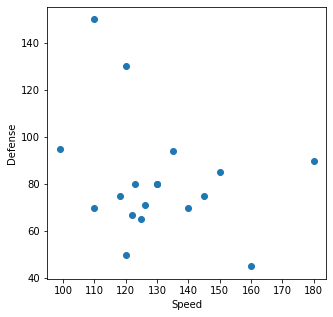

In [143]:
# Here I wanted to explore to see if there's a correlation between the fastest pokemon
fig,axes = plt.subplots(figsize=(5,5))
axes.scatter(Fastest_P['Speed'],Fastest_P['Defense'])
axes.set_xlabel('Speed')
axes.set_ylabel('Defense')
#Based upon t scatter graph below i 

To get an overview if there was any correlation between the Fastest Pokemon that may allow us to understand why they are fast. I decided to create a heat map.

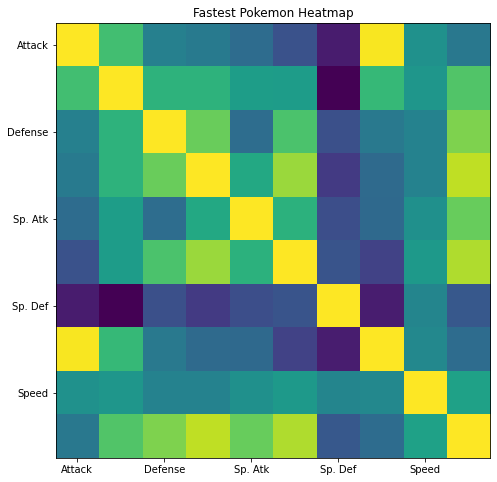

In [194]:
fig,axes = plt.subplots(figsize=(8,8))
Attributes = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']
plt.imshow(Fastest_P.corr())
axes.set_xticklabels(Attributes)
axes.set_yticklabels(Attributes)
axes.set_title('Fastest Pokemon Heatmap')
plt.show()
# Based upon the outcome of this heatmpa there is a Correlation between the 

Here I haved decided to look at Pokemon of Generation 6 and the appropriate plot to use was a Scatter graph.

Text(0.5, 1.0, 'Generation 6 ')

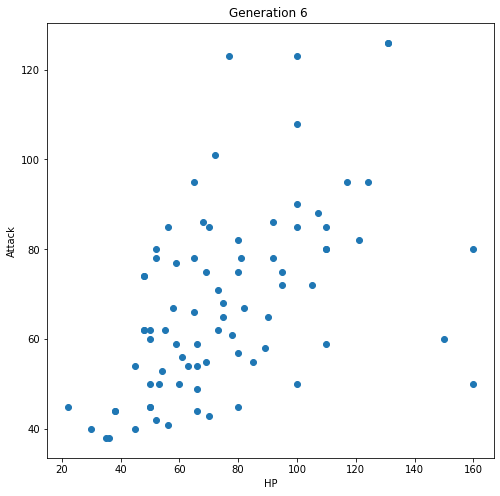

In [168]:
# Here I have created a simple scatter plot of Generation 6 Pokemon by HP
fig,axes = plt.subplots(figsize=(8,8))
axes.scatter(Gen_Six['Attack'],Gen_Six['HP'])
axes.set_ylabel('Attack')
axes.set_xlabel('HP')
axes.set_title('Generation 6 ')

Here I have decided to look at the overall dataset and compare the correlation between Spped and Attack.

Text(0, 0.5, 'Attack')

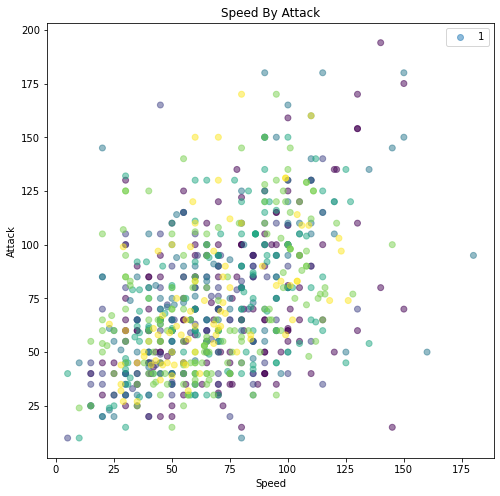

In [204]:
fig,axes = plt.subplots(figsize=(8,8))
colour = df['Generation']

axes.scatter(df['Speed'],df['Sp. Atk'], c=colour, alpha = 0.5)
axes.set_title('Speed By Attack')
axes.legend(df['Generation'])
axes.set_xlabel('Speed')
axes.set_ylabel('Attack')


Text(0.5, 1.0, 'Average HP per Generation by Legendary')

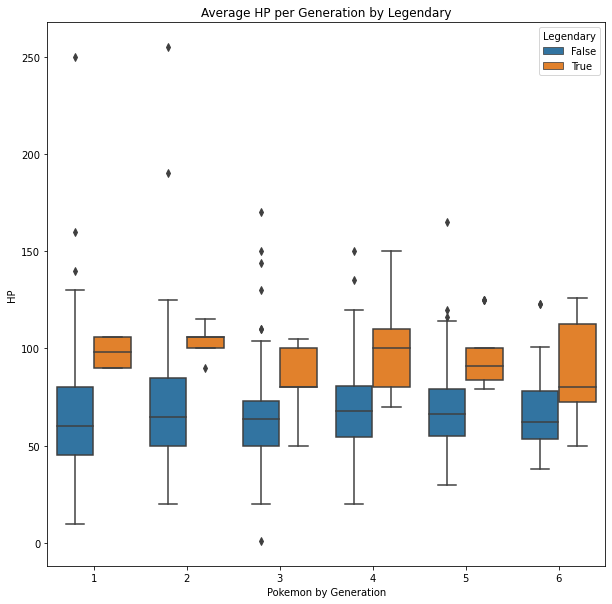

In [26]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(df['Generation'], df['HP'], hue=df['Legendary'])
axes.set_xlabel('Pokemon by Generation')
axes.set_title('Average HP per Generation by Legendary')


In [ ]:
by_type = df[['Type 1', 'Legendary']]
by_type.head(18)

Text(0.5, 0, 'Legendary/Non Legendary')

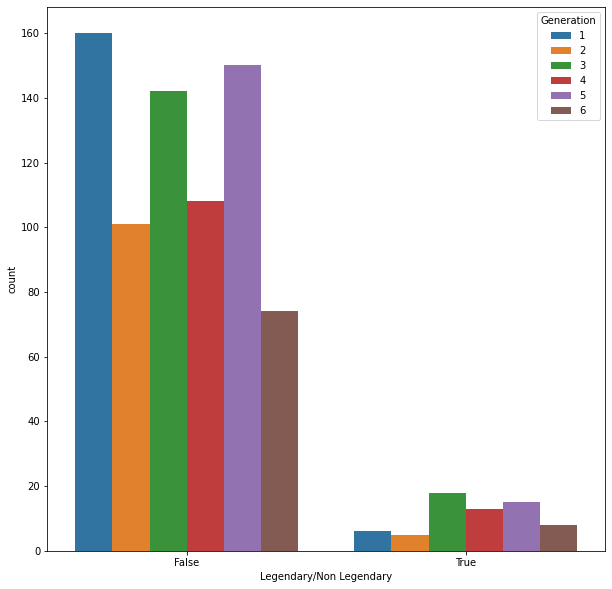

In [104]:
fig,axes = plt.subplots(figsize=(10,10))
#plt.bar(df['Type 1'], df['Total'], width=.5)
sns.countplot(df['Legendary'], hue=df['Generation'])
plt.xlabel('Legendary/Non Legendary')

In [28]:
Leg_Pokemon = df[df['Legendary'] == True][['Name','Type 1','Type 2','HP','Attack','Defense','Sp. Atk',
'Sp. Def','Speed','Generation','Total']]

Leg_Pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
156,Articuno,Ice,Flying,90,85,100,95,125,85,1,580
157,Zapdos,Electric,Flying,90,90,85,125,90,100,1,580
158,Moltres,Fire,Flying,90,100,90,125,85,90,1,580
162,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,680
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,780


In [29]:
Standard_Pokemon =df[df['Legendary'] == False][['Name','Type 1','Type 2','HP','Attack','Defense','Sp. Atk',
'Sp. Def','Speed','Generation','Total']]

Standard_Pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,625
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309


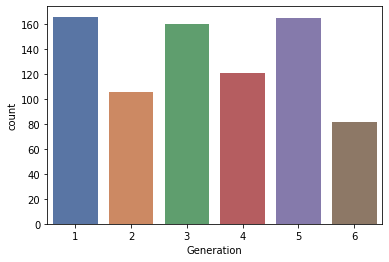

In [30]:
sns.countplot(x='Generation',data = df, palette = 'deep')

Text(0.5, 1.0, 'Grass Type HP per Gen')

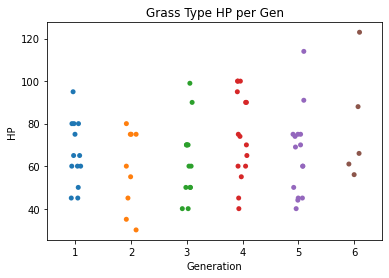

In [31]:
sns.stripplot(x='Generation',y=df[df['Type 1'] == 'Grass']['HP'], data = df)
plt.title('Grass Type HP per Gen')

In [ ]:
sns.pairplot(Standard_Pokemon)

In [ ]:
sns.pairplot(Leg_Pokemon)

In [33]:
STP= Standard_Pokemon.groupby(['Type 1'])[['HP','Attack','Defense','Sp. Atk']].mean()

In [ ]:
LTP= Leg_Pokemon.groupby(['Type 1'])[['HP','Attack','Defense','Sp. Atk']].mean()

In [ ]:
LTP.corrwith(STP, axis =1)

### What pokemon has the highest special attack that is not a legendary pokemon?

In [34]:
Standard_Pokemon.sort_values(['Sp. Atk'],ascending = False).iloc[0]

Name          AlakazamMega Alakazam
Type 1                      Psychic
Type 2                          NaN
HP                               55
Attack                           50
Defense                          65
Sp. Atk                         175
Sp. Def                          95
Speed                           150
Generation                        1
Total                           590
Name: 71, dtype: object

In [ ]:
LTP.corrwith(STP)['Sp. Atk']

In [247]:
df.iloc[:,4:10].mean()

HP         69.25875
Attack     79.00125
Defense    73.84250
Sp. Atk    72.82000
Sp. Def    71.90250
Speed      68.27750
dtype: float64

I decided to see if there is a correlation between Sp. Attack and Attack attributes.

Text(0.5, 1.0, 'Sp. Atk and Attack comparision')

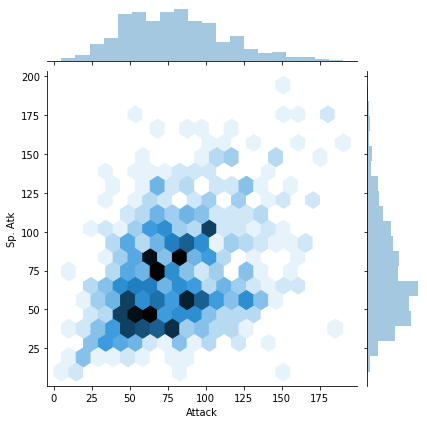

In [246]:
clr = df['Legendary']
sns.jointplot(df['Attack'],df['Sp. Atk'], kind ='hex')
axes.set_title('Sp. Atk and Attack comparision')

### What Pokemon are above average in all 6 categories.


In [18]:

df[df.iloc[:,4:10].values > df.iloc[:,3:9].mean().values][df.columns]


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
799,Volcanion,Fire,Water,80,110,120,130,90,70,6,True
799,Volcanion,Fire,Water,80,110,120,130,90,70,6,True
799,Volcanion,Fire,Water,80,110,120,130,90,70,6,True
799,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


### What type generaton has the most variation of Pokemon

In [249]:
GenPokemon = df[['Type 1','Type 2','Generation', 'Legendary']]
GenPokemon

,Type 1,Type 2,Generation,Legendary
0,Grass,Poison,1,False
1,Grass,Poison,1,False
2,Grass,Poison,1,False
3,Grass,Poison,1,False
4,Fire,NaN,1,False
...,...,...,...,...
795,Rock,Fairy,6,True
796,Rock,Fairy,6,True
797,Psychic,Ghost,6,True
798,Psychic,Dark,6,True


In [251]:
GenPokemon.groupby(['Type 1','Type 2', 'Generation']).agg(['sum','count'])

Legendary      
                                 sum count
Type 1 Type 2   Generation                
Bug    Electric 5                0.0     2
       Fighting 2                0.0     2
       Fire     5                0.0     2
       Flying   1                0.0     3
                2                0.0     3
...                              ...   ...
Water  Psychic  2                0.0     1
       Rock     2                0.0     1
                3                0.0     1
                5                0.0     2
       Steel    4                0.0     1

[212 rows x 2 columns]

### What generation has the strongest Pokemon.

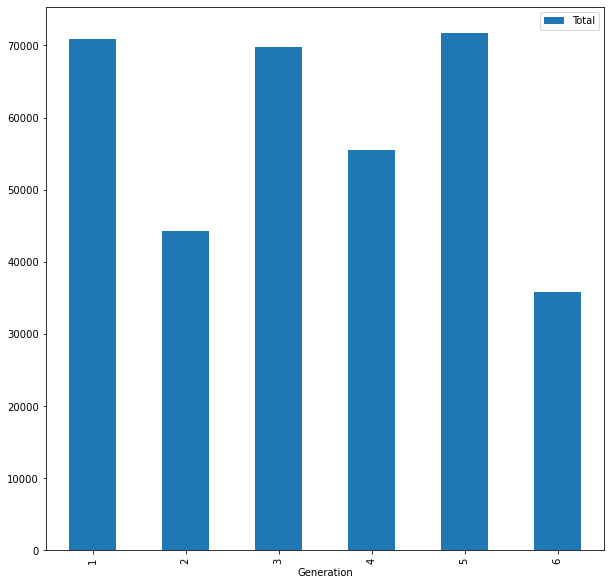

In [31]:
df[['Generation','Total']].groupby('Generation').sum().plot(kind='bar',figsize=(10,10))